<div id="top" style="background-color: #20BEFF; color: #ffffff; text-align: center; padding: 20px; width: 70%; margin: 10px auto 10px auto; border-bottom: 6px solid #EBB922;">
    <h1 style="color: #1C1D20; font-size: 2rem;">
       Unique Exploratory Data Analysis with Engaging Visualizations
    </h1>
</div>

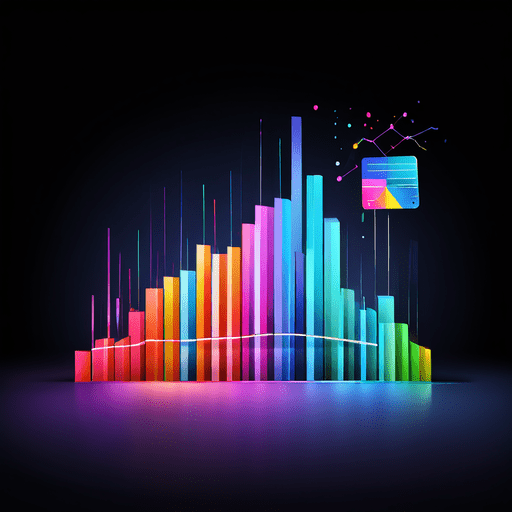


<div style="text-align: center;">
    <table>
        <tr>
            <th>Attribute</th>
            <th>Details</th>
        </tr>
        <tr>
            <td>Author</td>
            <td><strong>Muhammad Bilal Khan</strong></td>
        </tr>
        <tr>
            <td>Kaggle</td>
            <td><a href="https://www.kaggle.com/devbilalkhan" target="_blank"><img src="https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle Badge"/></a></td>
        </tr>
        <tr>
            <td>Twitter</td>
            <td><a href="https://twitter.com/devbilalkhan" target="_blank"><img src="https://img.shields.io/badge/Twitter-%23000000.svg?style=for-the-badge&logo=Twitter&logoColor=white" alt="Twitter Badge"/></a></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/devbilalkhan" target="_blank"><img src="https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white" alt="GitHub Badge"/></a></td>
        </tr>
        <tr>
            <td>Email</td>
            <td><a href="mailto:bilal.khan@live.com" target="_blank"><img src="https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=for-the-badge&logo=microsoft-outlook&logoColor=white" alt="Outlook Badge"/></a></td>
        </tr>
    </table>
</div>

## Goals
In this notebook, I will be demonstrating a unique visual analysis of the Credit Card Approval Prediction dataset. I will be performing this analysis based on the various features of the dataset. The visualization are created through Sanky Diagram, treemaps and scatter plots that helps to communicate the complex data relationships in a more accessible and interpretable manner.  

## CREDIT CARD APPROVAL PREDICTION DATASET OVERVIEW



The `application_record.csv` dataset provides a comprehensive overview of client applications for financial services. It includes personal, financial, and employment information that can be used to assess creditworthiness. Each entry represents a unique client identified by a number and includes various attributes that can be leveraged to predict potential loan repayment behaviors.

### Dataset 1

- **ID**: Unique identifier for each client.
- **CODE_GENDER**: Gender of the client.
- **FLAG_OWN_CAR**: Whether the client owns a car.
- **FLAG_OWN_REALTY**: Whether the client owns property.
- **CNT_CHILDREN**: The number of children the client has.
- **AMT_INCOME_TOTAL**: The total annual income of the client.
- **NAME_INCOME_TYPE**: The category of the client's income source.
- **NAME_EDUCATION_TYPE**: The highest education level the client has achieved.
- **NAME_FAMILY_STATUS**: The marital status of the client.
- **NAME_HOUSING_TYPE**: The client's living situation.
- **DAYS_BIRTH**: The client's age in days, counted backwards from the current day.
- **DAYS_EMPLOYED**: How long the client has been employed, counted backwards from the current day. Positive numbers indicate unemployment.
- **FLAG_MOBIL**: Whether the client owns a mobile phone.
- **FLAG_WORK_PHONE**: Whether the client has a work phone.
- **FLAG_PHONE**: Whether the client has a phone.
- **FLAG_EMAIL**: Whether the client has an email address.
- **OCCUPATION_TYPE**: The client's occupation.
- **CNT_FAM_MEMBERS**: The size of the client's family.

The `credit_record.csv` dataset tracks the credit history of clients, with each record reflecting a monthly snapshot of an individual's credit file.

### Dataset 2

- **ID**: Unique identifier for each client, matching the ID in the `application_record.csv`.
- **MONTHS_BALANCE**: The month of the record relative to the current month (0 is current, -1 is previous month, etc.).
- **STATUS**: The status of the client's credit for that month (e.g., no overdue, days past due, paid off).

This dataset is used to analyze a client's financial stability over time and is crucial for developing models that predict the likelihood of future loan repayment difficulties.
                                          
### Acknowledgement

My work is higly inspired by @gpreda.

In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from data_analysis_utils import inspect_frequent_values, inspect_missing_values, inspect_unique_values

In [4]:
credits = pd.read_csv("/kaggle/input/credit-card-approval-prediction/credit_record.csv")
applications = pd.read_csv("/kaggle/input/credit-card-approval-prediction/application_record.csv")

<div style="margin-left: auto; margin-right: 0; width: 110px; text-align: center; background-color: #20BEFF; color:#000000; padding: 8px 2px; border-bottom: 3px solid #FFD700;">
    <a href="#top"style="color: #000000; font-size: 0.9rem;" >BACK TO TOP</a> 
</div>

<div style="background-color: #20BEFF; font-size: 14px; color: #000000; width: auto; padding: 1rem; border-right: 6px solid #FFD700; border-top-right-radius: 1rem; display: inline-flex; align-items: center; justify-content: center;">
  <h1 style="text-align: left;">Data Inspection</h1>
</div>

In [5]:
credits.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


##### MONTHS_BALANCE

- **Explanation**: This is like a backwards-looking calendar for each client's financial records. The `MONTHS_BALANCE` is the time reference for the data, where `0` is the current month, `-1` is the previous month, `-2` is two months back, and so on. It's useful for tracking how a client's status has changed over time.

##### STATUS

- **Explanation**: The `STATUS` column is a quick snapshot of a client's loan repayment behavior for the corresponding month in `MONTHS_BALANCE`. It ranges from `0` to `5`, with `0` indicating 1-29 days past due, and `5` indicating serious delinquency (overdue or bad debts, write-offs for more than 150 days). Additionally, `C` means the debt was paid off that month, and `X` indicates there was no loan for the month.

In [6]:
applications.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Inspect Frequent Values

In [7]:
# Merge 'applications' and 'credits' dataframes on 'ID' and drop NA values
merged_df = pd.merge(applications, credits, on='ID', how='inner')
merged_df.dropna(inplace=True)

inspect_frequent_values(merged_df)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
Total,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667,537667
Freq,5009106,F,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-14667,-1539,1,0,0,0,Laborers,2.0,-1,C
Count,61,333832,306207,345471,343151,62694,332868,358317,384003,474177,1018,1528,537667,386252,376962,483508,131572,279187,17271,226185
Freq %,0.01,62.09,56.95,64.25,63.82,11.66,61.91,66.64,71.42,88.19,0.19,0.28,100.0,71.84,70.11,89.93,24.47,51.93,3.21,42.07


## Inspect Unique Values

In [16]:
inspect_unique_values(merged_df)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,INCOME_GROUP,TIME_PERIOD,DAYS_EMPLOYED_BINS
Unique,24914,2,2,2,9,194,5,5,5,6,5187,3290,1,2,2,2,18,10,60,8,8,6,6
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624,520624


## Inspect Missing Values

In [17]:
inspect_missing_values(merged_df)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,INCOME_GROUP,TIME_PERIOD,DAYS_EMPLOYED_BINS
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Missing %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data type,int64,object,object,object,int64,float64,object,object,object,object,int64,int64,int64,int64,int64,int64,object,float64,int64,object,category,category,category


<div style="margin-left: auto; margin-right: 0; width: 110px; text-align: center; background-color: #20BEFF; color:#000000; padding: 8px 2px; border-bottom: 3px solid #FFD700;">
    <a href="#top"style="color: #000000; font-size: 0.9rem;" >BACK TO TOP</a> 
</div>

<div style="background-color: #20BEFF; font-size: 14px; color: #000000; width: auto; padding: 1rem; border-right: 6px solid #FFD700; border-top-right-radius: 1rem; display: inline-flex; align-items: center; justify-content: center;">
  <h1 style="text-align: left;">Data Preparation</h1>
</div>


For the purposes of my analysis, I will implement the following strategy:
* I will merge two datasets.
* I will drop the column with significant null values.
* I will perform feature engineering where create new columns called `INCOME_GROUP`.
* I will replace `STATUS` and `FLAG_OWN_REALTY` codes with their respective labels.
* I will create time period bins for 'MONTHS_BALANCE', label them, and replace 'CODE_GENDER' values with 'Male' or 'Female'.

In [8]:
# Define income bins and labels
income_bins = [27000, (27000 + 135000) / 2, 135000, (135000 + 180000) / 2, 180000, 
               (180000 + 229500) / 2, 229500, (229500 + 1575000) / 2, 1575000]

income_labels = ['Very Low income', 'Low income', 'Lower-middle income', 'Middle income', 
                 'Upper-middle income', 'Moderate-high income', 'High income', 'Very High income']

# Create 'INCOME_GROUP' feature by binning 'AMT_INCOME_TOTAL' according to defined bins and labels
merged_df['INCOME_GROUP'] = pd.cut(merged_df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels, include_lowest=True)

# Define status and realty labels
status_labels = {'0': '1-29 days due', '1': '30-59 days due', '2': '60-89 days due', '3': '90-119 days due', 
                 '4': '120-149 days due', '5': '150+ days/write-offs', 'C': 'Paid off', 'X': 'No loan'}
realty_labels = {'Y': 'Yes Property', 'N': 'No Property'}

# Replace 'STATUS' and 'FLAG_OWN_REALTY' codes with meaningful labels
merged_df['STATUS'] = merged_df['STATUS'].replace(status_labels)
merged_df['FLAG_OWN_REALTY'] = merged_df['FLAG_OWN_REALTY'].replace(realty_labels)

# Define time period bins and labels
bins = [-61, -48, -36, -24, -12, -6, 0]
labels = ['4-5 years ago', '3-4 years ago', '2-3 years ago', '1-2 years ago', '6-12 months ago', 'Within 6 months']

# Create 'TIME_PERIOD' feature by binning 'MONTHS_BALANCE' according to defined bins and labels
merged_df['TIME_PERIOD'] = pd.cut(merged_df['MONTHS_BALANCE'], bins=bins, labels=labels, right=False)

# Define gender labels
gender_labels = {'M': 'Male', 'F': 'Female'}

# Replace 'CODE_GENDER' codes with meaningful labels
merged_df['CODE_GENDER'] = merged_df['CODE_GENDER'].replace(gender_labels)

<div style="margin-left: auto; margin-right: 0; width: 110px; text-align: center; background-color: #20BEFF; color:#000000; padding: 8px 2px; border-bottom: 3px solid #FFD700;">
    <a href="#top"style="color: #000000; font-size: 0.9rem;" >BACK TO TOP</a> 
</div>


<div style="background-color: #20BEFF; font-size: 14px; color: #000000; width: auto; padding: 1rem; border-right: 6px solid #FFD700; border-top-right-radius: 1rem; display: inline-flex; align-items: center; justify-content: center;">
  <h1 style="text-align: left;">Sanky Diagram</h1>
</div>


This section presents a Sankey diagram to show relationships in a credit card approval dataset. The diagram tracks the flow of applicants across different categories:

- `NAME_HOUSING_TYPE`: The housing type of the applicant.
- `NAME_INCOME_TYPE`: The income type of the applicant.
- `FLAG_OWN_REALTY`: Whether the applicant owns property.
- `STATUS`: The credit status of the applicant.

The Python code below groups the dataset by these variables and prepares the data for the Sankey diagram. The goal is to visualize how applicants are distributed across these variables and to identify any notable patterns.

In [9]:
# Group data and reset index to prepare for Sankey diagram
realty_to_housing = merged_df.groupby(['NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE'], observed=True).size().reset_index(name='count')
to_income_type = merged_df.groupby(['NAME_INCOME_TYPE', 'FLAG_OWN_REALTY'], observed=True).size().reset_index(name='count')
to_status = merged_df.groupby(['FLAG_OWN_REALTY', 'STATUS'], observed=True).size().reset_index(name='count')

# Extract unique categories for labeling
unique_house_types = realty_to_housing['NAME_HOUSING_TYPE'].unique().tolist()
unique_income_types = realty_to_housing['NAME_INCOME_TYPE'].unique().tolist()
unique_realty = to_income_type['FLAG_OWN_REALTY'].unique().tolist()
unique_status = to_status['STATUS'].unique().tolist()

# Combine all labels
labels = unique_realty + unique_income_types + unique_house_types + unique_status

# Map labels to indices for Sankey nodes
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Initialize lists for Sankey source, target, and value
source = []
target = []
value = []

# Populate lists with housing to income data
for _, row in realty_to_housing.iterrows():
    source.append(label_to_index[row['NAME_HOUSING_TYPE']])
    target.append(label_to_index[row['NAME_INCOME_TYPE']])
    value.append(row['count'])

# Populate lists with income to realty data
for _, row in to_income_type.iterrows():
    source.append(label_to_index[row['NAME_INCOME_TYPE']])
    target.append(label_to_index[row['FLAG_OWN_REALTY']])
    value.append(row['count'])

# Populate lists with realty to status data
for _, row in to_status.iterrows():
    source.append(label_to_index[row['FLAG_OWN_REALTY']])
    target.append(label_to_index[row['STATUS']])
    value.append(row['count'])

# Build and display the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="House Type / Income Type / Owns Property / Credit Status", font_size=10)
fig.show()

## Insights from Sanky Diagram

The dataset reveals key patterns in the distribution of housing types, income sources, and property ownership among applicants, along with their credit status. Here are three insights:

1. **Dominance of Working Category in Housing Types**: The `Working` income type category has the highest count across all housing types. Notably, applicants living in `House / apartment` represent the largest subgroup, with high amount of individuals in the `Working` category.

2. **Property Ownership Among Income Types**: When looking at the property ownership status, individuals with `Working` and `Commercial associate` income types show a higher likelihood of owning property (`Yes Property`) compared to other income types.

3. **Credit Status and Property Ownership**: Applicants who own property (`Yes Property`) have a higher count of `Paid off` credit status, suggesting that property owners might have a better credit standing. Conversely, those without property (`No Property`) have a higher proportion in the `No loan` category, indicating they might be newer to credit or currently do not have loans.

<div style="margin-left: auto; margin-right: 0; width: 110px; text-align: center; background-color: #20BEFF; color:#000000; padding: 8px 2px; border-bottom: 3px solid #FFD700;">
    <a href="#top"style="color: #000000; font-size: 0.9rem;" >BACK TO TOP</a> 
</div>


<div style="background-color: #20BEFF; font-size: 14px; color: #000000; width: auto; padding: 1rem; border-right: 6px solid #FFD700; border-top-right-radius: 1rem; display: inline-flex; align-items: center; justify-content: center;">
  <h1 style="text-align: left;">Sanky Diagram</h1>
</div>


The code below prepares a Sankey diagram that visualizes the flow of credit card applicants through various demographic and financial stages. These stages are based on the following categories:

- `CODE_GENDER`: The gender of the applicant.
- `INCOME_GROUP`: The income group of the applicant.
- `NAME_EDUCATION_TYPE`: The educational level of the applicant.
- `NAME_FAMILY_STATUS`: The family status of the applicant.
- `TIME_PERIOD`: The time period related to the credit process.

We group the dataset by these attributes to understand the distribution of applicants. The aim is to show the connections between gender, income, education, family status, and time period in the context of credit card approvals.

In [10]:
merged_df.dropna(inplace=True)
# Aggregating data
gender_to_edu = merged_df.groupby(['CODE_GENDER', 'INCOME_GROUP'], observed=True).size().reset_index(name='count')
to_edu = merged_df.groupby(['INCOME_GROUP', 'NAME_EDUCATION_TYPE'], observed=True).size().reset_index(name='count')
to_family_status = merged_df.groupby(['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'], observed=True).size().reset_index(name='count')
to_time_period = merged_df.groupby(['NAME_FAMILY_STATUS', 'TIME_PERIOD'], observed=True).size().reset_index(name='count')

# Creating combined list of unique labels
unique_gender_types = gender_to_edu['CODE_GENDER'].unique().tolist()
unique_income_group = to_edu['INCOME_GROUP'].unique().tolist()
unique_edu = to_family_status['NAME_EDUCATION_TYPE'].unique().tolist()
unique_family_status = to_family_status['NAME_FAMILY_STATUS'].unique().tolist()
unique_time_period = to_time_period['TIME_PERIOD'].unique().tolist()

# Combining labels
labels =  unique_gender_types + unique_income_group + unique_edu + unique_family_status + unique_time_period

# Mapping labels to indices
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Initializing lists for Sankey diagram
source = []
target = []
value = []

# Populating source, target, and value lists
for _, row in gender_to_edu.iterrows():
    source.append(label_to_index[row['CODE_GENDER']])
    target.append(label_to_index[row['INCOME_GROUP']])
    value.append(row['count'])

for _, row in to_edu.iterrows():
    source.append(label_to_index[row['INCOME_GROUP']])
    target.append(label_to_index[row['NAME_EDUCATION_TYPE']])
    value.append(row['count'])
    
for _, row in to_family_status.iterrows():
    source.append(label_to_index[row['NAME_EDUCATION_TYPE']])
    target.append(label_to_index[row['NAME_FAMILY_STATUS']])
    value.append(row['count'])
    
for _, row in to_time_period.iterrows():
    source.append(label_to_index[row['NAME_FAMILY_STATUS']])
    target.append(label_to_index[row['TIME_PERIOD']])
    value.append(row['count'])

# Constructing the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=source, target=target, value=value)
)])

# Setting title for the diagram
fig.update_layout(title_text="Gender / Education Level / Marital Status / Month Balance", font_size=10)

# Displaying the Sankey diagram
fig.show()

## Insights from Sanky Diagram

### 1. Gender and Income Disparity in Credit Card Applications

There is a notable difference in the volume of credit card applications between genders across various income levels. Key points include:

- In **very low** income categories, there is a **high** number of applications from females compared to males.
- The trend continues in **low** income categories with females applying more frequently than males.
- Conversely, in the **high** income category, the number of male applications is **slightly higher** than that of females, suggesting a shift in the pattern of applications with increasing income levels.

These observations may reflect different socio-economic behaviors between genders and could indicate targeted marketing strategies by credit card companies.

### 2. Education Level's Impact on Credit Card Applications

The data demonstrates a correlation between education levels and credit card application counts, with the following trends:

- Applicants with **secondary education** are significantly more prevalent in the **very low** income group compared to those with **higher education**.
- This trend persists into the **high** income group, where applicants with secondary education still constitute the majority, far outnumbering those with an **academic degree**.

These patterns suggest that secondary education holders are more likely to apply for credit cards across all income groups, which may be due to the accessibility of credit products to this demographic or their specific financial needs.

<div style="margin-left: auto; margin-right: 0; width: 110px; text-align: center; background-color: #20BEFF; color:#000000; padding: 8px 2px; border-bottom: 3px solid #FFD700;">
    <a href="#top"style="color: #000000; font-size: 0.9rem;" >BACK TO TOP</a> 
</div>


<div style="background-color: #20BEFF; font-size: 14px; color: #000000; width: auto; padding: 1rem; border-right: 6px solid #FFD700; border-top-right-radius: 1rem; display: inline-flex; align-items: center; justify-content: center;">
  <h1 style="text-align: left;">Treemap</h1>
</div>


In [11]:
# Aggregate and sort data
df = merged_df.groupby(["NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE"])["AMT_INCOME_TOTAL"].agg("count").reset_index()
df = df.sort_values(by=["NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE"])

# Rename columns
df.columns = ["Education Type", "Work Status", "Income"]

# Create and display treemap
fig = px.treemap(df, path=["Education Type", "Work Status"], 
                 values='Income', color='Income', 
                 hover_data=['Education Type'], color_continuous_scale="Greens", 
                 color_continuous_midpoint=np.average(df['Income'], weights=df['Income']))

# Update layout and display treemap
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), height=1000, title="Income per Education and Work Status")
fig.show()

## Summary of Education and Work Status Income Data

- **`Academic Degree Holders`** have the lowest reported income among commercial associates.

- **`Higher Education`**:
  - The largest income is reported by working individuals, followed by commercial associates.
  - State servants with higher education also have a significant income presence.
  - Pensioners and students with higher education have minimal income figures.
  

- **`Incomplete Higher Education`**:
  - Individuals with incomplete higher education working as commercial associates and in working status have moderate income levels.
  - State servants with incomplete higher education have a lower income presence.
  

- **`Lower Secondary Education`**:
  - All categories (commercial associate, state servant, working) have relatively low income figures, with working individuals slightly higher.
  

- **`Secondary/Special Secondary Education`**:
  - Commercial associates have the highest income, suggesting a large workforce in this category.
  - Working individuals and state servants also have substantial incomes.
  - Pensioners and students have the lowest income levels within this education type.

Overall, individuals with higher education working as commercial associates or in working status have the highest incomes, while academic degree holders and lower secondary education individuals report lower incomes.

<div style="margin-left: auto; margin-right: 0; width: 110px; text-align: center; background-color: #20BEFF; color:#000000; padding: 8px 2px; border-bottom: 3px solid #FFD700;">
    <a href="#top"style="color: #000000; font-size: 0.9rem;" >BACK TO TOP</a> 
</div>


<div style="background-color: #20BEFF; font-size: 14px; color: #000000; width: auto; padding: 1rem; border-right: 6px solid #FFD700; border-top-right-radius: 1rem; display: inline-flex; align-items: center; justify-content: center;">
  <h1 style="text-align: left;">Scatter Plot</h1>
</div>

In [12]:
# Generate bin edges and labels
bin_edges = np.linspace(-15713, -17, num=7)
bin_labels = ['15+ years', '12-15 years', '9-12 years', '6-9 years', '3-6 years', '0-3 years']

# Bin 'DAYS_EMPLOYED' and create a new column
merged_df['DAYS_EMPLOYED_BINS'] = pd.cut(merged_df['DAYS_EMPLOYED'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [13]:
# Group data and calculate aggregates
df = merged_df.groupby(["DAYS_EMPLOYED_BINS", "NAME_INCOME_TYPE"], observed=True)["AMT_INCOME_TOTAL"].agg(["count", "sum"]).reset_index()
df2 = merged_df.groupby(["DAYS_EMPLOYED_BINS", "NAME_INCOME_TYPE"], observed=True)["CNT_FAM_MEMBERS"].agg("mean").reset_index()

# Merge aggregated dataframes
df = df.merge(df2)

# Rename columns for clarity
df.columns = ["Employment Duration", "Income Type", "Income Count", "Income Amount", "Average Family Size"]

# Create scatter plot
fig = px.scatter(df, x='Income Count', y='Average Family Size', color='Employment Duration', size='Income Amount', size_max=50, hover_name='Income Type',
                 title="Avg Family Size vs. Income Count & Amount by Employment Duration & Income Type")

# Display plot
fig.show()

## Key Insights from Employment Duration and Income Data

- **`Long-term Employment (15+ years)`**: Working individuals have the highest income amount, but a lower average family size compared to commercial associates.

- **`Mid-term Employment (6-15 years)`**: Working individuals consistently show the highest income amounts and income counts, with a stable average family size close to 2.

- **`Short-term Employment (0-6 years)`**: Commercial associates and working individuals dominate income counts and amounts, with commercial associates showing a slightly higher average family size.

- **`Pensioners and Students`**: Represent the lowest income counts and amounts across all employment durations, with pensioners maintaining an average family size of 2 and students peaking at 3 in the 0-3 years category.

The data suggests a strong relationship between employment duration and financial metrics, with working individuals leading in income, and commercial associates showing higher family sizes in shorter employment terms.

<div style="background-color: #20BEFF; font-size: 14px; color: #000000; width: auto; padding: 1rem; border-right: 6px solid #FFD700; border-top-right-radius: 1rem; display: inline-flex; align-items: center; justify-content: center;">
  <h1 style="text-align: left;">Conclusion</h1>
</div>

In this notebook, I have demonstrated a unique visual analysis of the Credit Card Approval Prediction dataset through various insightful features. My use of Sanky Diagrams, treemaps, and scatter plots has shed light on the complex data relationships in an accessible and easily interpretable manner.

Highlights from my analysis include:

- The Sanky Diagram that I created revealed the intricate pathways of credit approval across demographics, showcasing how factors like gender, income, and education intertwine.
- With treemaps, I was able to uncover and present the distribution of credit application outcomes, highlighting the prevalence of approvals within specific job sectors.
- My scatter plots examined the interplay between family size and annual income in relation to credit approval, offering a nuanced view of the criteria that may affect an individual's creditworthiness.

These visual tools have not only deepened my understanding of the dataset but have also facilitated a straightforward interpretation of the complex dynamics at play. The insights I've gained maybe crucial for financial entities aiming to enhance their credit evaluation strategies and for individuals striving to comprehend the determinants of their credit approval odds.

<div style="margin-left: auto; margin-right: 0; width: 110px; text-align: center; background-color: #20BEFF; color:#000000; padding: 8px 2px; border-bottom: 3px solid #FFD700;">
    <a href="#top"style="color: #000000; font-size: 0.9rem;" >BACK TO TOP</a> 
</div>

<div id="top" style="background-color: #20BEFF; color: #ffffff; text-align: center; padding: 20px; width: 70%; margin: 10px auto 10px auto; border-bottom: 6px solid #FFD700;">
    <h1 style="color: #1C1D20; font-size: 2rem;">
       THANK YOU FOR YOUR TIME!
    </h1>
</div>